##  Example of using "Trie of rules" library

There are two options for using the library:

1) having a data and minimum support value, create a Trie of rules with authomaticly generated association rrules using popular library(mlxtend: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/)

2) having original data, create a Trie of rules with previosly mined association rules(or frequent sequences). The association rules set should be presented as a list of items in a rule.

Both approaches are provided below.


In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


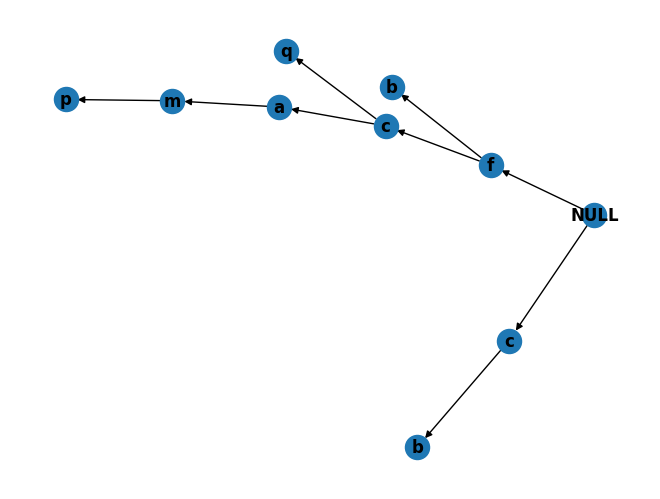

In [54]:
from trieofrules import trieofrules

#original dataset
data = [
        ['f','c','a','m','p','q'],
        ['f','c','a','b','m'],
        ['f','b','e'],
        ['c','b','p'],
        ['f','c','a','m','p'] ]

#association rules for visualisation presented as a list of frequent sequences
rules = [['f','c','a','m','p'],
        ['f','b'],
        ['c','b'],
        ['f','c','q']
        ]

#1st approcah using only data
TOR = trieofrules(data = data, min_support = 0.3, alg='FP-max' ) #supported algorithms: FP-max, FP-growth, Apriori

#2nd approach using data and pre-mined frequent sequences
TOR_premined = trieofrules(data = data, alg = 'Apriori', frequent_sequences = rules)

#draw trie of rules without metics
TOR_premined.draw()

#save as a grpah file. Supprted formats: gexf, gml, graphml
TOR.save_graph(filename = 'Trie of rules example.gml',fileformat = 'gml')
 

## Bakery dataset example

In [55]:
import csv

with open('datasets/bakery_data.csv') as f:
    reader = csv.reader(f)
    bakery_data = list(reader)
    
TOR_bakery = trieofrules(data = bakery_data, min_support = 0.02, alg='FP-max' ) 
TOR_bakery.save_graph('output/bakery trie of rules.graphml')

## Retail data example

In [56]:
with open('datasets/retail_data.csv') as f:
    reader = csv.reader(f)
    retail_data = list(reader)

TOR_retail = trieofrules(data = retail_data, min_support = 0.015, alg = "FP-max", min_len=2)
TOR_retail.save_graph("output/retail trie of rules.graphml")

# Groceries with freq sequence

In [57]:
import csv
with open('datasets/groceries.csv') as f:
    reader = csv.reader(f)
    bakery_data = list(reader)
    
TOR_bakery = trieofrules(data = bakery_data, min_support = 0.01, alg='FP-rowth', min_len = 2 ) 

# cut leaves with conf<0.3
TOR_bakery.filter_trie(0.3)
TOR_bakery.save_graph('output/groceries_tor.graphml')

# Groceries with rules

In [58]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

with open('datasets/groceries.csv') as f:
    reader = csv.reader(f)
    groceries_data = list(reader)
    
te = TransactionEncoder()
te_ary = te.fit(groceries_data).transform(groceries_data)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)
...,...,...
328,0.011998,"(whole milk, root vegetables, tropical fruit)"
329,0.014540,"(whole milk, root vegetables, yogurt)"
330,0.010473,"(soda, yogurt, whole milk)"
331,0.015150,"(whole milk, yogurt, tropical fruit)"


In [59]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,0.512224
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
2,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315,0.389597
3,(berries),(other vegetables),0.033249,0.193493,0.010269,0.308869,1.596280,0.003836,1.166938,0.386391
4,(berries),(whole milk),0.033249,0.255516,0.011795,0.354740,1.388328,0.003299,1.153774,0.289329


In [60]:
list_of_rules = [list(x[0]) + list(x[1]) for x in rules[['antecedents','consequents' ]].values.tolist()]
list_of_rules[:5]

[['beef', 'other vegetables'],
 ['beef', 'root vegetables'],
 ['beef', 'whole milk'],
 ['berries', 'other vegetables'],
 ['berries', 'whole milk']]

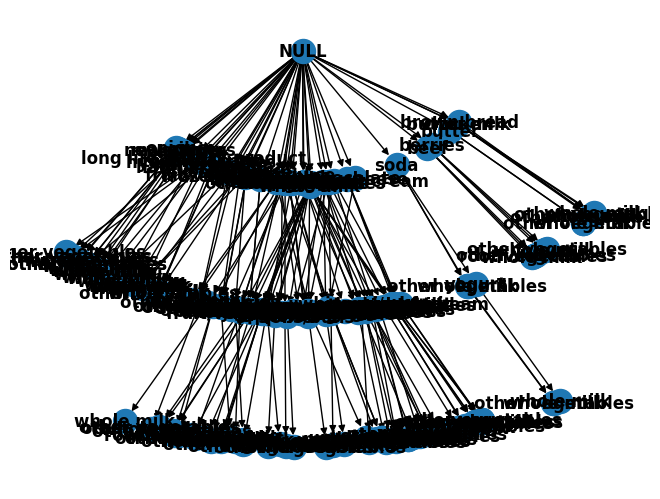

In [61]:
#2nd approach using data and pre-mined frequent sequences
TOR_groceries = trieofrules(data = groceries_data, alg = 'Apriori', frequent_sequences = list_of_rules, sorted = False)

#draw trie of rules without metics
TOR_groceries.draw()
# TOR_groceries.filter_trie(0.3)
#save as a grpah file. Supprted formats: gexf, gml, graphml
TOR_groceries.save_graph(filename = 'output/groceries_rules.gml',fileformat = 'gml')
 

In [62]:
rules[rules['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416,0.512224
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251
2,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315,0.389597
3,(berries),(other vegetables),0.033249,0.193493,0.010269,0.308869,1.596280,0.003836,1.166938,0.386391
4,(berries),(whole milk),0.033249,0.255516,0.011795,0.354740,1.388328,0.003299,1.153774,0.289329
...,...,...,...,...,...,...,...,...,...,...
120,"(soda, yogurt)",(whole milk),0.027351,0.255516,0.010473,0.382900,1.498535,0.003484,1.206423,0.342037
121,"(whole milk, tropical fruit)",(yogurt),0.042298,0.139502,0.015150,0.358173,2.567516,0.009249,1.340701,0.637483
122,"(yogurt, tropical fruit)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528,0.521384
123,"(whole milk, whipped/sour cream)",(yogurt),0.032232,0.139502,0.010880,0.337539,2.419607,0.006383,1.298943,0.606250


In [63]:
['beef', 'other vegetables']
['beef', 'root vegetables']
['beef', 'whole milk']
['berries', 'other vegetables']
['berries', 'whole milk']
['berries', 'yogurt']
['bottled water', 'whole milk']
['brown bread', 'whole milk']
['butter', 'other vegetables']
['butter', 'whole milk']
['butter milk', 'other vegetables']
['butter milk', 'whole milk']
['chicken', 'other vegetables']
['chicken', 'whole milk']
['chocolate', 'whole milk']
['citrus fruit', 'other vegetables']
['citrus fruit', 'whole milk']
['coffee', 'whole milk']
['cream cheese ', 'other vegetables']
['cream cheese ', 'whole milk']
['cream cheese ', 'yogurt']
['curd', 'other vegetables']
['curd', 'whole milk']
['curd', 'yogurt']
['dessert', 'other vegetables']
['dessert', 'whole milk']
['domestic eggs', 'other vegetables']
['domestic eggs', 'whole milk']
['frankfurter', 'rolls/buns']
['frankfurter', 'whole milk']
['frozen vegetables', 'other vegetables']
['frozen vegetables', 'whole milk']
['fruit/vegetable juice', 'whole milk']
['ham', 'whole milk']
['hamburger meat', 'other vegetables']
['hamburger meat', 'whole milk']
['hard cheese', 'whole milk']
['hygiene articles', 'whole milk']
['long life bakery product', 'whole milk']
['margarine', 'other vegetables']
['margarine', 'whole milk']
['napkins', 'whole milk']
['newspapers', 'whole milk']
['oil', 'whole milk']
['onions', 'other vegetables']
['onions', 'whole milk']
['pip fruit', 'other vegetables']
['pork', 'other vegetables']
['root vegetables', 'other vegetables']
['sugar', 'other vegetables']
['tropical fruit', 'other vegetables']
['whipped/sour cream', 'other vegetables']
['white bread', 'other vegetables']
['other vegetables', 'whole milk']
['yogurt', 'other vegetables']
['pastry', 'whole milk']
['pip fruit', 'whole milk']
['pork', 'whole milk']
['sausage', 'rolls/buns']
['rolls/buns', 'whole milk']
['root vegetables', 'whole milk']
['sausage', 'whole milk']
['sliced cheese', 'whole milk']
['sugar', 'whole milk']
['tropical fruit', 'whole milk']
['waffles', 'whole milk']
['whipped/sour cream', 'whole milk']
['white bread', 'whole milk']
['yogurt', 'whole milk']
['whole milk', 'bottled water', 'other vegetables']
['bottled water', 'other vegetables', 'whole milk']
['whole milk', 'butter', 'other vegetables']
['other vegetables', 'butter', 'whole milk']
['citrus fruit', 'root vegetables', 'other vegetables']
['citrus fruit', 'other vegetables', 'root vegetables']
['whole milk', 'citrus fruit', 'other vegetables']
['citrus fruit', 'other vegetables', 'whole milk']
['whole milk', 'citrus fruit', 'yogurt']
['citrus fruit', 'yogurt', 'whole milk']
['whole milk', 'curd', 'yogurt']
['curd', 'yogurt', 'whole milk']
['whole milk', 'domestic eggs', 'other vegetables']
['domestic eggs', 'other vegetables', 'whole milk']
['whole milk', 'fruit/vegetable juice', 'other vegetables']
['fruit/vegetable juice', 'other vegetables', 'whole milk']
['whole milk', 'pastry', 'other vegetables']
['pastry', 'other vegetables', 'whole milk']
['whole milk', 'pip fruit', 'other vegetables']
['other vegetables', 'pip fruit', 'whole milk']
['whole milk', 'pork', 'other vegetables']
['pork', 'other vegetables', 'whole milk']
['rolls/buns', 'root vegetables', 'other vegetables']
['whole milk', 'rolls/buns', 'other vegetables']
['rolls/buns', 'other vegetables', 'whole milk']
['rolls/buns', 'yogurt', 'other vegetables']
['root vegetables', 'tropical fruit', 'other vegetables']
['other vegetables', 'tropical fruit', 'root vegetables']
['whole milk', 'root vegetables', 'other vegetables']
['whole milk', 'other vegetables', 'root vegetables']
['root vegetables', 'other vegetables', 'whole milk']
['root vegetables', 'yogurt', 'other vegetables']
['whole milk', 'sausage', 'other vegetables']
['sausage', 'other vegetables', 'whole milk']
['soda', 'other vegetables', 'whole milk']
['soda', 'whole milk', 'other vegetables']
['whole milk', 'tropical fruit', 'other vegetables']
['other vegetables', 'tropical fruit', 'whole milk']
['other vegetables', 'tropical fruit', 'yogurt']
['yogurt', 'tropical fruit', 'other vegetables']
['whole milk', 'whipped/sour cream', 'other vegetables']
['whipped/sour cream', 'other vegetables', 'whole milk']
['whipped/sour cream', 'other vegetables', 'yogurt']
['whipped/sour cream', 'yogurt', 'other vegetables']
['whole milk', 'yogurt', 'other vegetables']
['yogurt', 'other vegetables', 'whole milk']
['rolls/buns', 'root vegetables', 'whole milk']
['rolls/buns', 'tropical fruit', 'whole milk']
['rolls/buns', 'yogurt', 'whole milk']
['root vegetables', 'tropical fruit', 'whole milk']
['root vegetables', 'yogurt', 'whole milk']
['soda', 'yogurt', 'whole milk']
['whole milk', 'tropical fruit', 'yogurt']
['yogurt', 'tropical fruit', 'whole milk']
['whole milk', 'whipped/sour cream', 'yogurt']
['whipped/sour cream', 'yogurt', 'whole milk']

['whipped/sour cream', 'yogurt', 'whole milk']